In [2]:
import requests
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
resp = requests.get(url)
print(resp)

<Response [200]>


In [3]:
path = 'Data'
with open(path+'horario.txt', 'wb') as output:
    output.write(resp.content)

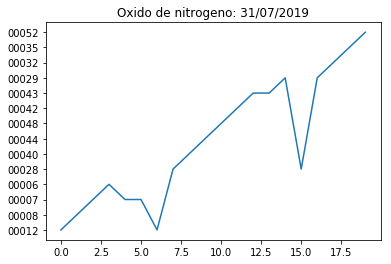

In [4]:
import matplotlib.pyplot as plt
import csv
with open(path+'horario.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if(row[0]+row[1]+row[2]=='28079004' and
          row[3]=='12'):
            plt.title("Oxido de nitrogeno: "
                     +row[8]+"/"+row[7]+"/"+row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            while hora <= 23:
                if row[desp+2*hora+1]=='V':
                    vs.append(row[desp+2*hora])
                    horas.append(hora)
                hora +=1 
            plt.plot(horas, vs)
            plt.show()

Utilizando menos informacion

In [1]:
import requests
from contextlib import closing #leer el vlor devuelto por requests.get
import csv
import codecs #Leer strings en formato UTF-8
import matplotlib.pyplot as plt
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
with closing(requests.get(url, stream = True)) as r:
    reader = csv.reader(codecs.iterdecode(
        r.iter_lines(),
        'utf-8'),
                       delimiter=',')
    for row in reader:
        if(row[0]+row[1]+row[2]=='28079004' and
          row[3]=='12'):
            plt.title("Oxido de nitrogeno: "
                     +row[8]+"/"+row[7]+"/"+row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            while hora <= 23:
                if row[desp+2*hora+1]=='V':
                    vs.append(row[desp+2*hora])
                    horas.append(hora)
                hora +=1 
            plt.plot(horas, vs)
            plt.show()

<Figure size 640x480 with 1 Axes>

<h1>HTML</h1>

In [2]:
import requests
from bs4 import BeautifulSoup
url = "Data/mini.html"
with open(url, "r") as f:
    page = f.read()
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Mini Test
  </title>
 </head>
 <body>
  <div id="date">
   7/31/2019
  </div>
  <div id="content">
   COntenido de Python
  </div>
 </body>
</html>


In [3]:
hijosDoc = list(soup.children)
print([type(item) for item in hijosDoc])
print(hijosDoc)

[<class 'bs4.element.Doctype'>, <class 'bs4.element.NavigableString'>, <class 'bs4.element.Tag'>]
['html', '\n', <html>
<head>
<title>Mini Test</title>
</head>
<body>
<div id="date">7/31/2019</div>
<div id="content">COntenido de Python</div>
</body>
</html>]


In [4]:
html = hijosDoc[2]
print(list(html.children))

['\n', <head>
<title>Mini Test</title>
</head>, '\n', <body>
<div id="date">7/31/2019</div>
<div id="content">COntenido de Python</div>
</body>, '\n']


In [5]:
body = list(html.children)[3]
print(list(body.children))

['\n', <div id="date">7/31/2019</div>, '\n', <div id="content">COntenido de Python</div>, '\n']


In [6]:
divDate = list(body.children)[1]
print(divDate.get_text())

7/31/2019


In [8]:
divs = soup.find_all("div")
print(divs[0].get_text())
print(soup.find("div").get_text())

7/31/2019
7/31/2019


In [9]:
print(soup.find("div", id="date").get_text())

7/31/2019


In [10]:
print(soup.select("html div")[0].get_text())

7/31/2019


In [12]:
import requests
url = "https://www.boe.es/informacion/hora_oficial.php"
#url = "http://horalegal.inm.gov.co/"
r = requests.get(url)
print(r)

<Response [200]>


In [14]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, "html.parser")
cajaHora = soup.find("p",class_="centrador")
#print(list(cajaHora.children)[1].get_text())
print(cajaHora)

<p class="centrador">lunes,  5 de agosto de 2019, 23:33:19</p>


In [21]:
print(list(cajaHora.children))

['lunes,  5 de agosto de 2019, 23:33:19']


<h1>Selenium</h1>

In [6]:
from selenium import webdriver
driver = webdriver.Chrome()
url = "https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx"
driver.get(url)

Reemplazar el codigo anterior si no se puede modificar el path

In [4]:
import os
chromedrive = "chromedriver.exe"
os.environ["webdriver.chrome.driver"] = chromedrive
driver = webdriver.Chrome(executable_path=chromedrive)

In [8]:
coord = driver.find_element_by_link_text("COORDENADAS")
coord.click()
lat = driver.find_element_by_id("ctl00_Contenido_txtLatitud")
lon = driver.find_element_by_id("ctl00_Contenido_txtLongitud")
latitud = "28.2723368"
longitud = "-16.66.00606"
lat.send_keys(latitud)
lon.send_keys(longitud)

In [9]:
datos = driver.find_element_by_id("ctl00_Contenido_btnDatos")
datos.click()

In [13]:
driver.execute_script("window.history.go(-1)") #Regresar a la pagina anterior

In [14]:
driver.execute_script("window.history.go(+1)") #Ir a la pagina siguiente

<h3>Componente "/"</h3>

In [2]:
from selenium import webdriver
import os
chromedrive = "chromedriver.exe"
os.environ["webdriver.chrome.driver"] = chromedrive
driver = webdriver.Chrome(executable_path=chromedrive)
html = driver.find_element_by_xpath("/html") #Elemento html que cuelga de la raiz del documento
print(html.text)

In [3]:
head = driver.find_element_by_xpath("/html/head")
body = driver.find_element_by_xpath("/html/body")

In [4]:
otro = driver.find_element_by_xpath("/html/otro")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/otro"}
  (Session info: chrome=76.0.3809.100)


In [5]:
html2 = body.find_element_by_xpath("/html/head")

In [6]:
#No ejecutar para evitar cambiar la pagina de referencia
driver.excute_script("windows.history.go(-1)")
print(body.text)

AttributeError: 'WebDriver' object has no attribute 'excute_script'

In [7]:
hijos = driver.find_elements_by_xpath("/html/body/*") #"*" representa cualquier hijo
for element in hijos:
    print(elemtn.tag_name)

In [8]:
divs = driver.find_elements_by_xpath("/html/body/*/div")

In [9]:
print(len(divs))

0


In [10]:
divs = body.find_elements_by_xpath("./body/*/div")
print(len(divs))

0


<h4>Filtros [...]</h4>

In [11]:
#//label - buscamos elementos label a cualquier nivel del documento
e = driver.find_elements_by_xpath("(//label)[position()=3]")
print(e[0].text)

IndexError: list index out of range

In [12]:
#xpath tiene el primer elemento en 1 y no en 0
e = driver.find_elements_by_xpath("(//label)[3]")
print(e[0].text)

IndexError: list index out of range

In [13]:
etiqs = driver.find_elements_by_xpath("//label")
print(etiqs[2].text)

IndexError: list index out of range

In [14]:
#Podemos usar last()-1 para referirnos al penultimo elemento
ulti = driver.find_elements_by_xpath("(//label)[last()]")
print(ulti[0].text)

IndexError: list index out of range

In [15]:
#Otro de los usos es quedarse con los elementos con valores concretos con @
xpath = "//label[@class='control-lable black text-left']"
etiqs = driver.find_elements_by_xpath(xpath)
print(etiqs[0].text)

IndexError: list index out of range

In [16]:
#Una forma mas compleja de hacer la misma busqueda es:
xpath = "//*[./span/text()='Referencia Catastral']//label"
etiq = driver.find_elements_by_xpath(xpath)
print(etiq.text)

AttributeError: 'list' object has no attribute 'text'

In [17]:
#Finalizar Selenium
driver.close()

<h2>Navegadores headless</h2>
<p>Son navegadores sin interfaz grafica</p>

In [24]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--windows-size=1920x1080')
driver = webdriver.Chrome(chrome_options=chrome_options)

C:\Users\mramirez\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
